In [9]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import math

inp = 'C:\\Users\\13811\\Desktop\\002.png'
I = np.array(Image.open(inp).convert('L'))# グレースケールに変換

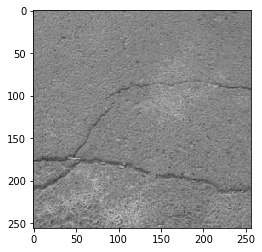

In [10]:
I_show = Image.open(inp).convert('L')

plt.imshow(I_show)
plt.show()

In [32]:
s = 1.6 # Standard Deviation Value
k = math.sqrt(2)  # Constant multiplicative factor value

L5 = cv2.GaussianBlur(I,(3,3), math.ceil(s *(k**4)))# Laplace of Gaussian Layer 5
L4 = cv2.GaussianBlur(I,(3,3), math.ceil(s* (k**3))) # Laplace of Gaussian Layer 4
L3 = cv2.GaussianBlur(I,(3,3), math.ceil(s*(k**2))) # Laplace of Gaussian Layer 3
L2 = cv2.GaussianBlur(I,(3,3), math.ceil(s *k)) # Laplace of Gaussian Layer2
L1 = cv2.GaussianBlur(I,(3,3), math.ceil(s)) # Laplace of Gaussian Layer 1

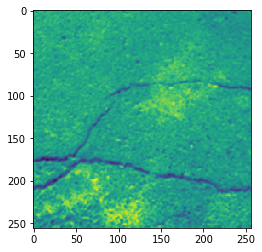

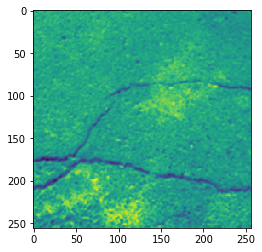

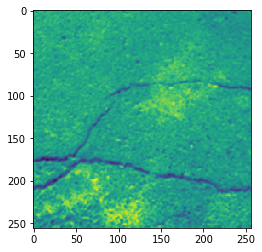

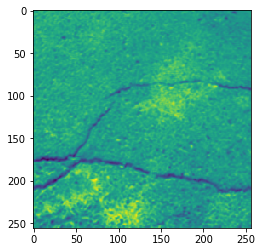

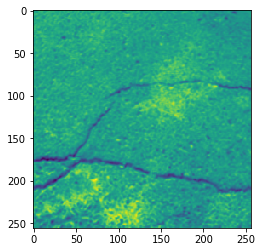

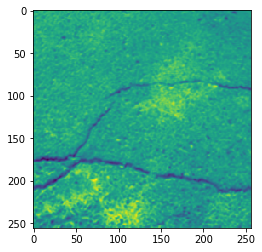

In [33]:
plt.imshow(L5)
plt.show()
plt.imshow(L4)
plt.show()
plt.imshow(L4)
plt.show()
plt.imshow(L3)
plt.show()
plt.imshow(L2)
plt.show()
plt.imshow(L1)
plt.show()

In [34]:
DOG4 = np.array(L5-L4) # Difference of Gaussian layer 4
DOG3 = np.array(L4-L3) # Difference of Gaussian layer 3
DOG2 = np.array(L3-L2) # Difference of Gaussian layer 2
DOG1 = np.array(L2-L1) # Difference of Gaussian layer 1

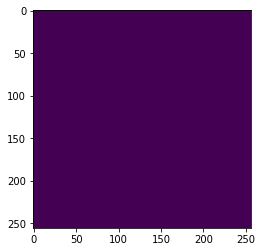

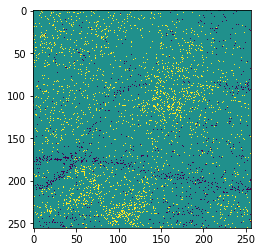

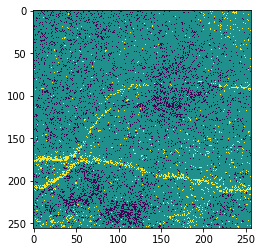

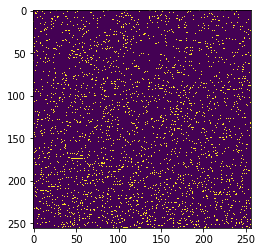

In [35]:
plt.imshow(DOG4)
plt.show()
plt.imshow(DOG3)
plt.show()
plt.imshow(DOG2)
plt.show()
plt.imshow(DOG1)
plt.show()

In [61]:
M2 = DOG3 # copy GoA3
M = DOG2 # copy GoA2
M1 = DOG1 # copy GoA1
x_ex_oc1 = []
y_ex_oc1 = []
IDoG = []

for i in range(1,len(M[:-1,0])):
    for j in range(1,len(M[0,:-1])):
        compare = (M[i-1,j+1],M[i,j+1],M[i+1,j+1],M[i-1,j],M[i+1,j],M[i-1,j-1],M[i,j-1],M[i+1,j-1],
                   M1[i-1,j+1],M1[i,j+1],M1[i+1,j+1],M1[i-1,j],M1[i,j],M1[i+1,j],M1[i-1,j-1],M1[i,j-1],M1[i+1,j-1],
                   M2[i-1,j+1],M2[i,j+1],M2[i+1,j+1],M2[i-1,j],M2[i,j],M2[i+1,j],M2[i-1,j-1],M2[i,j-1],M2[i+1,j-1])
        if M[i,j] > max(compare) or M[i,j] < min(compare):
            x_ex_oc1.append(i) # note x vertex
            y_ex_oc1.append(j) # note y vertex
            IDoG.append(M[i,j]) # note the pixel value 

In [43]:
for x,y in zip(x_ex_oc1, y_ex_oc1):
    print(x,y)

1 210
2 197
2 232
4 228
5 178
5 253
6 225
6 227
7 167
7 232
9 237
10 242
11 194
11 251
12 196
12 231
13 108
14 247
16 215
18 228
19 34
19 56
19 212
19 231
20 101
20 240
21 97
21 151
21 220
21 231
22 227
22 235
23 250
25 220
26 114
27 139
27 156
27 231
28 221
29 179
31 66
32 38
32 43
32 52
32 158
32 183
33 34
33 124
33 221
35 120
37 144
37 227
40 132
40 147
40 235
40 237
40 250
41 119
41 243
42 238
43 219
43 249
44 142
45 128
45 219
48 102
48 205
49 146
50 162
52 68
53 17
53 37
53 195
54 216
54 226
55 249
56 209
56 232
57 37
59 47
60 72
60 144
60 243
61 29
63 71
67 21
68 202
69 1
69 253
70 5
70 129
71 45
71 206
72 28
72 138
73 120
74 86
77 119
80 124
81 4
83 100
83 214
84 207
86 142
86 150
86 214
87 165
87 237
88 59
88 105
91 120
92 9
92 122
93 2
93 107
95 236
97 36
98 67
98 105
98 203
99 220
102 117
103 86
104 214
105 87
107 85
109 35
109 122
111 238
114 2
114 51
114 225
115 126
117 7
118 250
118 252
119 41
119 223
120 125
122 97
122 123
125 49
125 96
127 192
128 237
131 92
131 223
131

In [62]:
for i in range(len(DOG2[i])): # discarding the low contrast extremas    
            nx = x_ex_oc1[i] # x index of extrema...
            ny = y_ex_oc1[i] # y index of extrema...
            
            if abs(IDOG[nx+1,ny+1]) <= 0:    # 0 here is the contrast threshold below which we eliminate the pixels...
                IDOG[i] = 0 #eliminating the extrema....
            else:
                rx,ry = nx+1,ny+1 # rx,ry are the indecies of the neighboring pixels of extremas....
                if rx+1<IDOG.shape[0] and ry+1<IDOG.shape[1]: # avoiding index error on the below operation
                    fxx= IDOG[rx-1,ry]+IDOG[rx+1,ry]-2*IDOG[rx,ry]# double derivate in x direction
                    fyy= IDOG[rx,ry-1]+IDOG[rx,ry+1]-2*IDOG[rx,ry]; # double derivate in y direction
                    fxy= IDOG[rx-1,ry-1]+IDOG[rx+1,ry+1]-IDOG[rx-1,ry+1]-IDOG[rx+1,ry-1]; # derivate inx and y direction
                trace=fxx+fyy    # trace(H) = Dxx+Dyy 
                deter=fxx*fyy-fxy*fxy # Determinant(H) = DxxDyy - Dxy^2
                r=trace*trace/deter # curvature 
                th= ((r+1)^2)/r # curvature threshold...
                # If the current keypoint id poorly localized, its rejected...
                if (deter < 0 or r > th): # if the pixel belongs to an edge....
                    IDOG[i]=0 # discard that pixel...
                    
            index = np.array(nonzero(IDOG)) # updating the list of keypoints after elimination...
            ID_new,x_new,y_new = [],[],[]
            
            for i in range(size(index)):
                ID_new.append(IDOG[index[0,i]])
                x_new.append(x_ex_oc1[index[0,i]])
                y_new.append(y[index[0,i]])


NameError: name 'IDOG' is not defined